In [1]:
#          ----------------------Table of Contents------------------------

# 5. Creating a profiling variable. 
# 6. Showing the distribution of profiles. 
# 7. Aggregating measures on a customer-profile level for usage frequency and expenditure.
# 8. Comparing your customer profiles with regions and departments.
# 9. Produsing charts to illustrate the results. 
# 10. Export dataframe. 

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing dataframe
path = r'C:\Users\ztrim\06-2025 Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\ztrim\\06-2025 Instacart Basket Analysis'

In [5]:
# Import df_active_anonymized from first notebook 
df_active_anonymized = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_anonymized_step_4'))

In [6]:
df_active_anonymized.describe()

C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\ztrim\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,Unnamed: 0.1,Unnamed: 0_x,order_id,customers_current_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,aisle_id,department_id,prices,max_order,avg_spend_user,ord_regularity_median,age,num_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,29303281.0,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.709710e+06,1.709710e+06,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,NaN,2.559850e+04,8.363038e+00,6.061019e-01,2.560020e+04,7.118859e+01,9.922365e+00,1.193352e+01,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.865318e+05,9.865318e+05,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,0.0,1.408096e+04,7.135399e+00,4.886127e-01,1.408251e+04,3.822194e+01,6.282441e+00,4.913444e+02,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554910e+05,8.554910e+05,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.708667e+06,1.708667e+06,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.0,2.528800e+04,6.000000e+00,1.000000e+00,2.528900e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565858e+06,2.565858e+06,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421081e+06,3.421081e+06,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [8]:
df_active_anonymized['max_order'] = df_active_anonymized['max_order'].astype('int8')
df_active_anonymized['product_id'] = df_active_anonymized['product_id'].astype('int32')

In [9]:
df_active_anonymized['orders_day_of_week'] = df_active_anonymized['orders_day_of_week'].astype('int8')
df_active_anonymized['order_hour_of_day'] = df_active_anonymized['order_hour_of_day'].astype('int8')
df_active_anonymized['days_since_prior_order'] = df_active_anonymized['days_since_prior_order'].astype('float16')
df_active_anonymized['ord_regularity_median'] = df_active_anonymized['ord_regularity_median'].astype('float32') 

In [10]:
df_active_anonymized['aisle_id'] = df_active_anonymized['aisle_id'].astype('int16')
df_active_anonymized['department_id'] = df_active_anonymized['department_id'].astype('int8')
df_active_anonymized['reordered'] = df_active_anonymized['reordered'].astype('int8')
df_active_anonymized['prices'] = df_active_anonymized['prices'].astype('float32')

In [11]:
df_active_anonymized['num_dependents'] = df_active_anonymized['num_dependents'].astype('int8')
df_active_anonymized['age'] = df_active_anonymized['age'].astype('int8')
df_active_anonymized['income'] = df_active_anonymized['income'].astype('int32')

In [12]:
df_active_anonymized.describe()

C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\ztrim\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\ztrim\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,Unnamed: 0.1,Unnamed: 0_x,order_id,customers_current_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,aisle_id,department_id,prices,max_order,avg_spend_user,ord_regularity_median,age,num_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,29303281.0,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.709710e+06,1.709710e+06,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,NaN,2.559850e+04,8.363038e+00,6.061019e-01,2.560020e+04,7.118859e+01,9.922365e+00,1.193351e+01,3.442569e+01,1.193352e+01,9.957143e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.865318e+05,9.865318e+05,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,0.0,1.408096e+04,7.135399e+00,4.886127e-01,1.408251e+04,3.822194e+01,6.282441e+00,4.913311e+02,2.489504e+01,7.992284e+01,6.494975e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554910e+05,8.554910e+05,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.708667e+06,1.708667e+06,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.0,2.528800e+04,6.000000e+00,1.000000e+00,2.528900e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565858e+06,2.565858e+06,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421081e+06,3.421081e+06,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [13]:
df_active_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   Unnamed: 0.1                    int64   
 1   Unnamed: 0_x                    int64   
 2   order_id                        int32   
 3   customers_current_order_number  int8    
 4   orders_day_of_week              int8    
 5   order_hour_of_day               int8    
 6   days_since_prior_order          float16 
 7   product_id                      int32   
 8   add_to_cart_order               int64   
 9   reordered                       int8    
 10  _merge                          category
 11  Unnamed: 0_y                    int64   
 12  product_name                    object  
 13  aisle_id                        int16   
 14  department_id                   int8    
 15  prices                          float32 
 16  match                           category
 17  busiest_day

In [16]:
# Create parenting status: "Single Adult" if no dependants, else "Parent"
def get_parenting_status(row):
    if row['num_dependents'] == 0:
        return 'Single Adult'
    else:
        return 'Parent'

df_active_anonymized['parenting_status'] = df_active_anonymized.apply(get_parenting_status, axis=1)
df_active_anonymized['parenting_status'].value_counts()

parenting_status
Parent          23224883
Single Adult     7739681
Name: count, dtype: int64

In [17]:
# Categorize age
def get_age_group(age):
    if age < 25:
        return 'Young'
    elif age < 55:
        return 'Adult'
    else:
        return 'Senior'

df_active_anonymized['age_group'] = df_active_anonymized['age'].apply(get_age_group)
df_active_anonymized['age_group'].value_counts()

age_group
Adult     14551339
Senior    12998031
Young      3415194
Name: count, dtype: int64

In [18]:
# Categorize income
def get_income_group(income):
    if income < 35000:
        return 'Low income'
    elif income < 75000:
        return 'Middle income'
    else:
        return 'High income'

df_active_anonymized['income_group'] = df_active_anonymized['income'].apply(get_income_group)
df_active_anonymized['income_group'].value_counts()

income_group
High income      21057884
Middle income     9008755
Low income         897925
Name: count, dtype: int64

In [20]:
# Due to system memory limitations, I created the customer_profile using parenting status (dependents), age group, and income group. 
# This combination still meets the brief by capturing key demographic and behavioral traits relevant for marketing segmentation. 
# I considered including shopping time (based on order_hour_of_day) but commented it out to reduce RAM usage.

# Categorize shopping time
# def get_shopping_time(hour):
#    if hour < 12:
#        return 'Morning shopper'
#    elif hour < 18:
#        return 'Afternoon shopper'
#    else:
#        return 'Evening shopper'

#df_active_anonymized['shopper_type'] = df_active_anonymized['order_hour_of_day'].apply(get_shopping_time)
#df_active_anonymized['shopper_type'].value_counts()

In [21]:
# Combine all into a customer profile
# Combine customer profile (without shopper_type)
df_active_anonymized['customer_profile'] = (
    df_active_anonymized['parenting_status'] + ' | ' +
    df_active_anonymized['age_group'] + ' | ' +
    df_active_anonymized['income_group']
)

df_active_anonymized['customer_profile'].value_counts()

customer_profile
Parent | Senior | High income            8227031
Parent | Adult | High income             6541397
Parent | Adult | Middle income           4015909
Single Adult | Senior | High income      2780247
Single Adult | Adult | High income       2172024
Parent | Young | Middle income           1455781
Single Adult | Adult | Middle income     1346064
Parent | Senior | Middle income          1288505
Parent | Young | High income             1024383
Single Adult | Young | Middle income      474666
Single Adult | Senior | Middle income     427830
Parent | Adult | Low income               353584
Single Adult | Young | High income        312802
Parent | Senior | Low income              208773
Single Adult | Adult | Low income         122361
Parent | Young | Low income               109520
Single Adult | Senior | Low income         65645
Single Adult | Young | Low income          38042
Name: count, dtype: int64

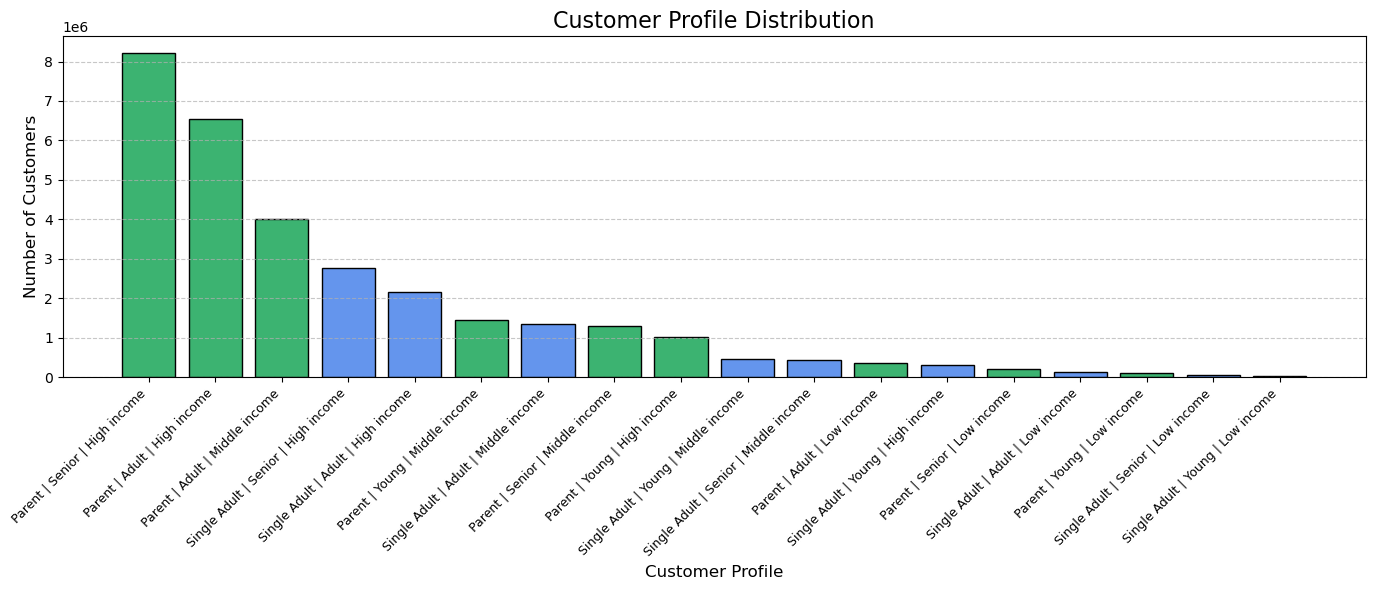

In [25]:
# 6. Show distribution of profiles
all_profiles = df_active_anonymized['customer_profile'].value_counts()

# Generate color list: blue for 'Single Adult', green for 'Parent'
colors = ['cornflowerblue' if 'Single Adult' in profile else 'mediumseagreen' for profile in all_profiles.index]

plt.figure(figsize=(14, 6))
bars = plt.bar(all_profiles.index, all_profiles.values, color=colors, edgecolor='black')

plt.title('Customer Profile Distribution', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [26]:
# 7. Aggregate usage frequency and expenditure stats by customer profile
profile_agg = df_active_anonymized.groupby('customer_profile').agg({
    'max_order': ['mean', 'min', 'max'],   
    'prices': ['mean', 'min', 'max']      
})

profile_agg.columns = ['_'.join(col) for col in profile_agg.columns]
profile_agg.reset_index(inplace=True)

#View results
profile_agg

,customer_profile,max_order_mean,max_order_min,max_order_max,prices_mean,prices_min,prices_max
0,Parent | Adult | High income,34.496468,5,99,14.477537,1.0,99999.0
1,Parent | Adult | Low income,32.170093,5,99,6.501774,1.0,25.0
2,Parent | Adult | Middle income,34.402115,5,99,7.640389,1.0,14900.0
3,Parent | Senior | High income,34.326588,5,99,12.947968,1.0,99999.0
4,Parent | Senior | Low income,31.087200,5,99,6.515868,1.0,25.0
5,Parent | Senior | Middle income,33.440648,5,99,6.962943,1.0,25.0
6,Parent | Young | High income,36.315887,5,99,18.768526,1.0,99999.0
7,Parent | Young | Low income,30.545407,5,99,6.477690,1.0,25.0
8,Parent | Young | Middle income,34.263099,5,99,7.809670,1.0,14900.0
9,Single Adult | Adult | High income,34.404987,5,99,15.141427,1.0,99999.0


In [27]:
# 8. Raw counts: How many of each customer profile exist per region
region_profile = pd.crosstab(df_active_anonymized['region'], df_active_anonymized['customer_profile'])
region_profile

customer_profile,Parent | Adult | High income,Parent | Adult | Low income,Parent | Adult | Middle income,Parent | Senior | High income,Parent | Senior | Low income,Parent | Senior | Middle income,Parent | Young | High income,Parent | Young | Low income,Parent | Young | Middle income,Single Adult | Adult | High income,Single Adult | Adult | Low income,Single Adult | Adult | Middle income,Single Adult | Senior | High income,Single Adult | Senior | Low income,Single Adult | Senior | Middle income,Single Adult | Young | High income,Single Adult | Young | Low income,Single Adult | Young | Middle income
region,,,,,,,,,,,,,,,,,,
Midwest,1527364,87546,948994,1934047,47418,284307,240536,26841,341644,540953,28659,304000,645164,14455,106980,72920,6608,103077
Northeast,1179463,60991,690456,1458534,35230,232865,191007,18447,243210,362312,22011,236550,493511,10573,79399,49852,6752,93522
South,2146085,122300,1349706,2745238,70743,419283,356043,36114,483694,720748,38769,452842,915426,19945,144918,113982,13063,162240
West,1688485,82747,1026753,2089212,55382,352050,236797,28118,387233,548011,32922,352672,726146,20672,96533,76048,11619,115827


In [29]:
# 8.1 Percentage breakdown per region
region_profile_pct = pd.crosstab(df_active_anonymized['region'], 
                                 df_active_anonymized['customer_profile'], 
                                 normalize='index') * 100
region_profile_pct.round(1)

customer_profile,Parent | Adult | High income,Parent | Adult | Low income,Parent | Adult | Middle income,Parent | Senior | High income,Parent | Senior | Low income,Parent | Senior | Middle income,Parent | Young | High income,Parent | Young | Low income,Parent | Young | Middle income,Single Adult | Adult | High income,Single Adult | Adult | Low income,Single Adult | Adult | Middle income,Single Adult | Senior | High income,Single Adult | Senior | Low income,Single Adult | Senior | Middle income,Single Adult | Young | High income,Single Adult | Young | Low income,Single Adult | Young | Middle income
region,,,,,,,,,,,,,,,,,,
Midwest,21.0,1.2,13.1,26.6,0.7,3.9,3.3,0.4,4.7,7.4,0.4,4.2,8.9,0.2,1.5,1.0,0.1,1.4
Northeast,21.6,1.1,12.6,26.7,0.6,4.3,3.5,0.3,4.5,6.6,0.4,4.3,9.0,0.2,1.5,0.9,0.1,1.7
South,20.8,1.2,13.1,26.6,0.7,4.1,3.5,0.4,4.7,7.0,0.4,4.4,8.9,0.2,1.4,1.1,0.1,1.6
West,21.3,1.0,13.0,26.4,0.7,4.4,3.0,0.4,4.9,6.9,0.4,4.4,9.2,0.3,1.2,1.0,0.1,1.5


In [31]:
# 8.2 Answer 
# For example, “Parent | Adult | High income” profiles are more common in the West and Midwest, while the Northeast has a slightly higher share of “Single Adult | Senior | High income” customers. These differences suggest that customer behavior and demographics vary by region. 
# This insight could help tailor regional marketing strategies or adjust product offerings.

In [32]:
# Export the active_anonymized dataframe to contiue making my charts in a new notebook due to the RAm issues 
df_active_anonymized.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_anonymized_step_4'))